## Labarotorio 4 Inteligencia Artificial 

### Task 1.1. Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

Para iniciar con este proceso, primero se deben importar las librerías correspondientes.

In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Posteriormente, ya se pueden importar los datos y almacenarlos en una matriz de NumPy.

In [3]:
data = pd.read_csv('kc_house_data.csv')
data_numpy = np.array(data)

print(data_numpy)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


### Task 1.2. Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

Para poder analizar las variables de precio y pies cuadrados de espacio, se debe primero separar las variables correspondientes del set de datos dado.

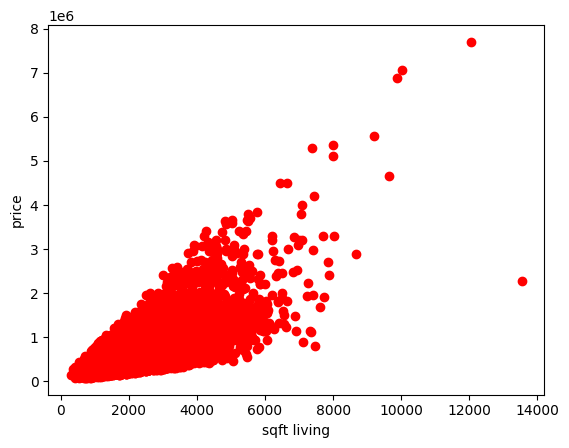

In [13]:
Y = data["price"]  # price
X = data["sqft_living"]  # sqft living

# Almacenar datos en numpy array
x = np.array(X)
y = np.array(Y)

# Graficar datos con nombre de ejes
plt.xlabel("sqft living")
plt.ylabel("price")
plt.scatter(x, y, color="red")

Ahora se crearan las respectivas matrices y vectores para posteriormente poder hacer el cálculo y crear el modelo de regresión lineal. Estas matrices relacionan las variables de precio con los pies cuadrados de living space.

In [46]:
# matriz w = almacena w0, w1, ..., wn
# matriz x = almacena 1, xn^1, xn^2, ..., xn^n
# matriz X = almacena 1, x1, x1^2, ..., x1^n; 1, x2, x2^2, ..., x2^n; ...; 1, xm, xm^2, ..., xm^n

grado = 1
N = len(x)

# Matriz de caracteristicas = X
X_matrix = np.array([[x[i] ** j for j in range(0, grado+1)] for i in range(N)])
print("\nMatriz de Caracteristicas (X):",X_matrix)

# Matriz de valores reales (t) = wT * X
Y_matrix = np.array([[y[i]] for i in range(N)])


Matriz de Caracteristicas (X): [[   1 1180]
 [   1 2570]
 [   1  770]
 ...
 [   1 1020]
 [   1 1600]
 [   1 1020]]


#### Calculo Teórico de Pesos (Paso no requerido)
En base a las matrices anteriormente creadas, se puede calcular el valor "teórico" de los pesos w0 y w1 a través de la siguiente función. 
[B0, B1] = (X^T.X)^-1 * (X^T.Y)


Matriz de Pesos (w): [[-43580.74309447]
 [   280.6235679 ]]


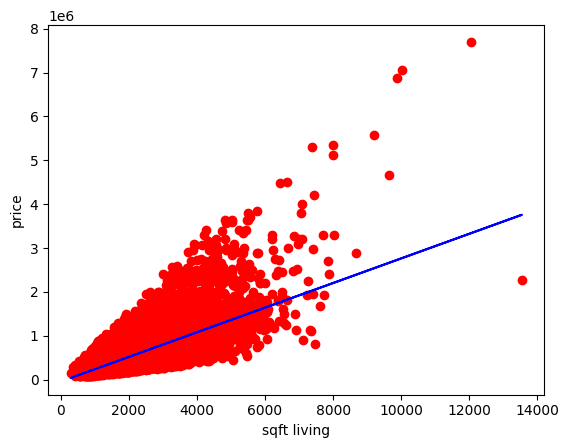

In [47]:
# En este caso, se calculó el valor teórico de w0 y w1 dado las matrices X y Y.
# Matriz w
w = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot((X_matrix.T).dot(Y_matrix))
print("\nMatriz de Pesos (w):",w)

# Graficar w0 y w1 con los datos
plt.scatter(x, y, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x, X_matrix.dot(w), color="blue")
plt.show()

### Task 1.3. Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).
Ya que anteriormente se creó el modelo polinomial de forma matricial (se crearon las respectivas matrices), ahora se puede implementar el descenso del grandiente para terminar el respectovo modelo.

Como primer paso, se calculó la función de pérdida con el vector de pesos teóricamente calculado. Posteriormente, se calculó la misma función pero con valores generados aleatoriamente.

Posteriormente, se calculó la diferencia o el "error" de la función de pérdida con números aleatorios.

Pesos iniciales: [[0.54592098]
 [0.4652641 ]]
Pesos obtenidos: [[  0.58047467]
 [263.08895533]]


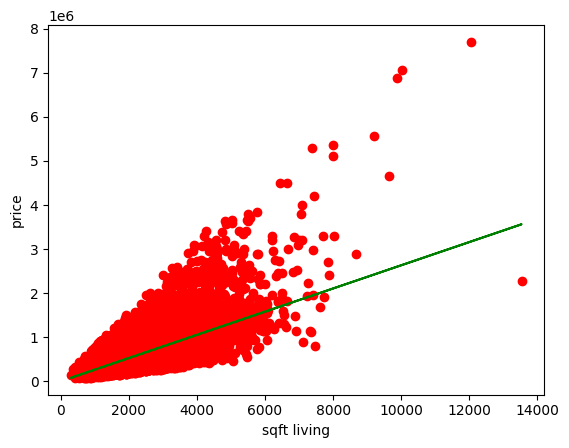

In [45]:
w0 = random.random()
w1 = random.random()
w = np.array([[w0], [w1]])

print("Pesos iniciales:", w)

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.000000001
num_iter = 10000

for i in range(num_iter):

    # Calcular el error (Valor real vs. Valor predicho)
    y_pred = X_matrix.dot(w)
    error = y_pred - Y_matrix

    # Calcular el gradiente
    funcion_perdida = (1/N) * X_matrix.T.dot(error)
    
    # Actualizar los pesos
    w = w - (learning_rate * funcion_perdida)

# Imprimir los pesos y la última pérdida
print("Pesos obtenidos:", w)

# Graficar w0 y w1 con los datos
plt.scatter(x, y, color="red")
plt.xlabel("sqft living")
plt.ylabel("price")
plt.plot(x, X_matrix.dot(w), color="green")
plt.show()

Utilizar el modelo ajustado para hacer predicciones

In [7]:
new_X = np.array([1500, 2000])  # ejemplos de nuevos valores de sqft living
new_X = np.vstack([new_X, np.ones(len(new_X))]).T
predictions = new_X @ theta

print(predictions)

NameError: name 'theta' is not defined

### Implementacion Vectorial

Cargar los datos desde el archivo CSV

In [ ]:
import numpy as np
import csv

def load_data(file_path, delimiter=","):
    data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=delimiter)
        for row in csv_reader:
            data.append(row)
    return data

Convertir los datos a una matriz de numpy

In [ ]:
def data_to_matrix(data, target_col, feature_cols):
    data = np.array(data[1:], dtype=float)[:, 1:] # Omitir la primera columna y la fila de encabezados
    X = data[:, feature_cols]
    y = data[:, target_col]
    return X, y

Normalizar los datos

In [ ]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

Calcular el costo (error) del modelo

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    cost = np.sum((h - y) ** 2) / (2 * m)
    return cost

Implementar el descenso de gradiente

In [ ]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        error = h - y
        grad = X.T.dot(error) / m
        theta -= alpha * grad
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

Implementacion

In [ ]:
# Cargar los datos desde el archivo
data = load_data("kc_house_data.csv")

# Definir las columnas que se utilizarán como características (features) y etiquetas (target)
feature_cols = [5] # sqft_living
target_col = [2] # price

# Convertir los datos a una matriz de numpy
X, y = data_to_matrix(data, target_col, feature_cols)

# Normalizar los datos
X, mean, std = normalize(X)

# Añadir una columna de unos a la matriz X para el término de sesgo (bias)
X = np.hstack((np.ones((len(y), 1)), X))

# Inicializar los pesos aleatoriamente
theta = np.random.rand(X.shape[1])

# Definir los hiperparámetros del algoritmo de gradiente descendente
alpha = 0.1
num_iters = 1000

# Ejecutar el algoritmo de gradiente descendente
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Imprimir los pesos del modelo
print("Pesos del modelo:", theta)


ValueError: could not convert string to float: '20141013T000000'

Graficar

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(num_iters), J_history)
plt.xlabel("Iteraciones")
plt.ylabel("Costo (error)")
plt.show()

NameError: name 'num_iters' is not defined

#### Uso de Cross Validation

In [ ]:
import numpy as np

def cross_validate(X, y, k=5):
    """
    Divide los datos en k partes y realiza k iteraciones del cross-validation.
    En cada iteración, una de las partes se usa como conjunto de prueba y el resto
    como conjunto de entrenamiento. Retorna los errores de entrenamiento y prueba
    para cada iteración.
    """
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    split_size = n // k
    train_errors = np.zeros(k)
    test_errors = np.zeros(k)
    for i in range(k):
        test_indices = np.arange(i*split_size, (i+1)*split_size)
        train_indices = np.concatenate((np.arange(0, i*split_size), np.arange((i+1)*split_size, n)))
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        # Entrenar el modelo con los datos de entrenamiento
        weights = fit_polynomial_regression(X_train, y_train)
        # Calcular los errores de entrenamiento y prueba
        train_errors[i] = calculate_error(X_train, y_train, weights)
        test_errors[i] = calculate_error(X_test, y_test, weights)
    return train_errors, test_errors

def fit_polynomial_regression(X, y, degree=1):
    """
    Entrena un modelo de regresión polinomial de grado "degree" utilizando
    los datos de entrada X y los valores objetivo y. Retorna los pesos
    (coeficientes) de la regresión.
    """
    X_poly = polynomial_features(X, degree)
    X_poly_T = np.transpose(X_poly)
    weights = np.linalg.inv(X_poly_T @ X_poly) @ (X_poly_T @ y)
    return weights

def polynomial_features(X, degree=1):
    """
    Expande los datos de entrada X para incluir todas las potencias de grado
    hasta el grado "degree". Retorna una nueva matriz con las características
    expandidas.
    """
    X_poly = X.copy()
    for i in range(2, degree+1):
        X_poly = np.column_stack((X_poly, np.power(X, i)))
    return X_poly

def calculate_error(X, y, weights):
    """
    Calcula el error cuadrático medio para un modelo de regresión y los datos
    de entrada y los valores objetivo. Retorna el error.
    """
    y_pred = predict(X, weights)
    error = np.mean((y - y_pred)**2)
    return error

def predict(X, weights):
    """
    Calcula las predicciones de un modelo de regresión para los datos de entrada
    X utilizando los pesos (coeficientes) dados. Retorna las predicciones.
    """
    return X @ weights

def split_data(X, y, train_ratio=0.8):
    """
    Divide los datos de entrada X y los valores objetivo y en conjuntos de entrenamiento
    y prueba, utilizando el ratio especificado. Retorna los conjuntos de entrenamiento y
    prueba.
    """
    n = X.shape[0]
    train_size = int(train_ratio * n)
    indices = np.arange(n)
    np.random.shuffle(indices)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

# Cargar los datos
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True)
feature_cols = [0]
target_col = [1]

# Convertir los datos a una matriz de numpy
X, y = data_to_matrix(data, target_col, feature_cols)

# Normalizar los datos
X, mean, std = normalize(X)

# Dividir los datos en entrenamiento y prueba
X_train, y_train, X_test, y_test = split_data(X, y, train_ratio=0.8)

# Realizar cross-validation con los datos de entrenamiento
train_errors, test_errors = cross_validate(X_train, y_train, k=5)

# Calcular los errores promedio de entrenamiento y prueba
mean_train_error = np.mean(train_errors)
mean_test_error = np.mean(test_errors)

print("Error de entrenamiento promedio: ", mean_train_error)
print("Error de prueba promedio: ", mean_test_error)




Error de entrenamiento promedio:  nan
Error de prueba promedio:  nan
